<h1>Historical Data Extraction/Visualization Stock Data</h1>

Imad Uddin

<ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>


In [40]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [47]:
#Question 2: Extract Tesla Stock Data using yFinance.
Tesla = yf.Ticker("TSLA")
Tesla_data = Tesla.history(period="max")
Tesla_data.reset_index(inplace=True)
Tesla_data.tail()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3269,2023-06-26 00:00:00-04:00,250.070007,258.369995,240.699997,241.050003,179990600,0.0,0.0
3270,2023-06-27 00:00:00-04:00,243.240005,250.389999,240.850006,250.210007,164968200,0.0,0.0
3271,2023-06-28 00:00:00-04:00,249.699997,259.880005,248.889999,256.239990,159770800,0.0,0.0
3272,2023-06-29 00:00:00-04:00,258.029999,260.739990,253.610001,257.500000,131283400,0.0,0.0
3273,2023-06-30 00:00:00-04:00,260.600006,264.450012,259.890015,261.769989,112267600,0.0,0.0


In [42]:
#Question 2 Extract Tesla stock data using Web Scraping
import requests
from bs4 import BeautifulSoup

# Send a GET request to the website
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history#:~:text=The%20Tesla%2052%2Dweek%20high,last%2052%20weeks%20is%20211.15."
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the table with the historical stock data
table = soup.find("table", class_="historical_data_table")

# Extract the table rows
rows = table.find_all("tr")

# Extract the table headers
headers = [header.text for header in rows[0].find_all("th")]

# Initialize an empty list to store the stock data
stock_data = []

# Iterate over the remaining rows and extract the data
for row in rows[1:]:
    data = [cell.text for cell in row.find_all("td")]
    stock_data.append(data)

# Print the headers and stock data
print(headers)
for data in stock_data:
    print(data)


['Tesla Historical Annual Stock Price Data']
[]
['2023', '187.2040', '108.1000', '274.4500', '108.1000', '261.7700', '112.51%']
['2022', '263.0931', '399.9267', '399.9267', '109.1000', '123.1800', '-65.03%']
['2021', '259.9982', '243.2567', '409.9700', '187.6667', '352.2600', '49.76%']
['2020', '96.6657', '28.6840', '235.2233', '24.0813', '235.2233', '743.44%']
['2019', '18.2354', '20.6747', '28.7293', '11.9313', '27.8887', '25.70%']
['2018', '21.1540', '21.3687', '25.3047', '16.7040', '22.1867', '6.89%']
['2017', '20.9544', '14.4660', '25.6667', '14.4660', '20.7567', '45.70%']
['2016', '13.9845', '14.8940', '17.6947', '9.5780', '14.2460', '-10.97%']
['2015', '15.3362', '14.6207', '18.8173', '12.3333', '16.0007', '7.91%']
['2014', '14.8886', '10.0067', '19.0693', '9.2893', '14.8273', '47.85%']
['2013', '6.9601', '2.3573', '12.8913', '2.1940', '10.0286', '344.14%']
['2012', '2.0779', '1.8720', '2.5340', '1.5193', '2.2580', '18.59%']
['2011', '1.7870', '1.7747', '2.3293', '1.4553', '1.90

In [43]:
#Question 3 Extracting GameStop Stock Data Using yfinance
import yfinance as yf

gamestop = yf.Ticker("GME")
gamestop_stock_data = gamestop.history(period="1d")

print(gamestop_stock_data)


                                Open       High    Low  Close   Volume  \
Date                                                                     
2023-06-30 00:00:00-04:00  24.969999  25.129999  24.25  24.25  2797500   

                           Dividends  Stock Splits  
Date                                                
2023-06-30 00:00:00-04:00        0.0           0.0  


In [57]:
#Question 4Extracting GameStop GME Revenue Data Using Webscraping, and showing result using tail
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_="historical_data_table")

rows = table.find_all("tr")

headers = [header.text for header in rows[0].find_all("th")]

revenue_data = []

for row in rows[1:]:
    data = [cell.text for cell in row.find_all("td")]
    revenue_data.append(data)

# Display the last rows
n = 5  # Number of last rows to display
last_rows = revenue_data[-n:]

print(headers)
for data in last_rows:
    print(data)



['GameStop Annual Revenue(Millions of US $)']
['2013', '$8,887']
['2012', '$9,551']
['2011', '$9,474']
['2010', '$9,078']
['2009', '$8,806']


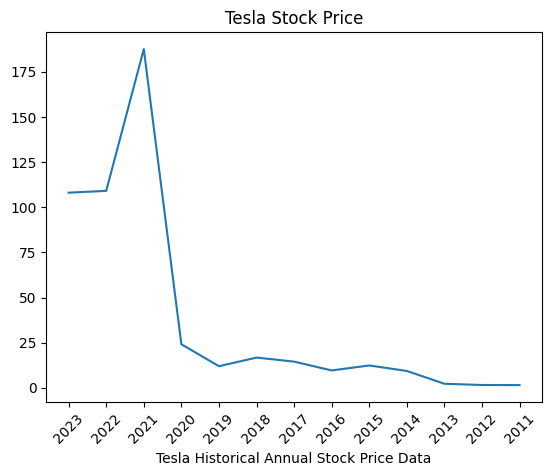

In [45]:
#Question 5 Tesla Stock and Revenue Graph
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history#:~:text=The%20Tesla%2052%2Dweek%20high,last%2052%20weeks%20is%20211.15."
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_="historical_data_table")

rows = table.find_all("tr")

headers = [header.text for header in rows[0].find_all("th")]

stock_data = []

for row in rows[1:]:
    data = [cell.text for cell in row.find_all("td")]
    if len(data) >= 5:  # Check for at least 5 data points
        stock_data.append(data)

# Extract date and close price values
dates = [data[0] for data in stock_data]
close_prices = [float(data[4].replace(",", "")) if len(data) >= 5 else 0.0 for data in stock_data]

# Plot the stock data
plt.plot(dates, close_prices)
plt.xlabel(headers[0])
plt.ylabel(headers[4] if len(headers) >= 5 else "")
plt.title("Tesla Stock Price")
plt.xticks(rotation=45)
plt.show()


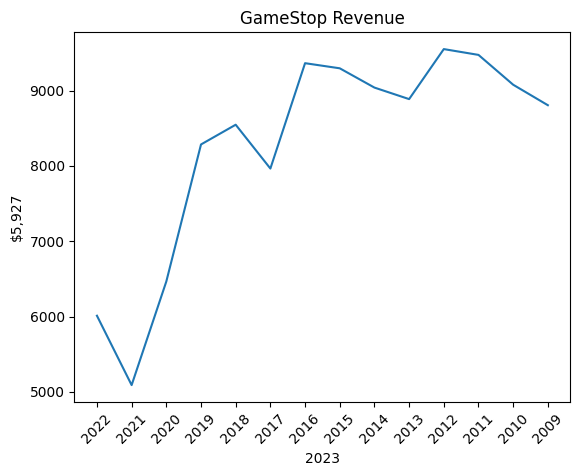

In [46]:
#Question 6 GameStop Stock and Revenue Dashboard
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_="historical_data_table")

rows = table.find_all("tr")

revenue_data = []

for row in rows:
    data = [cell.text.strip() for cell in row.find_all("td")]
    if len(data) > 0:
        revenue_data.append(data)

# Extract year and revenue values
headers = revenue_data[0]
revenue_data = revenue_data[1:]  # Exclude the header row

years = [data[0] for data in revenue_data]
revenues = [int(data[1].replace("$", "").replace(",", "")) for data in revenue_data]

# Plot the revenue data
plt.plot(years, revenues)
plt.xlabel(headers[0])
plt.ylabel(headers[1])
plt.title("GameStop Revenue")
plt.xticks(rotation=45)
plt.show()


In [48]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "GME"

# Get the stock data
gme_data = yf.download(ticker_symbol)

# Reset the index
gme_data.reset_index(inplace=True)

# Save the data to a CSV file
gme_data.to_csv("gme_stock_data.csv", index=False)

# Display the first five rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed
        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691667  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function

In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for the revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the table with the revenue data
table = soup.find("table", class_="historical_data_table")

# Extract the table rows
rows = table.find_all("tr")

# Extract the table headers
headers = [header.text for header in rows[0].find_all("th")]

# Initialize an empty list to store the revenue data
revenue_data = []

# Iterate over the remaining rows and extract the data
for row in rows[1:]:
    data = [cell.text for cell in row.find_all("td")]
    revenue_data.append(data)

# Create a DataFrame from the revenue data
gme_revenue = pd.DataFrame(revenue_data, columns=headers)

# Display the last five rows
print(gme_revenue.tail())


ValueError: 1 columns passed, passed data had 2 columns